In [2]:
import pandas as pd
import statsmodels.api as sm
data = pd.read_csv('cleaned_meta.csv')   
df = pd.DataFrame(data)

/Users/anitaaa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (19,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
for x in range (0,8):
    genre_col = 'genre_{}'.format(x)
    if x == 0:
        df_genre = pd.get_dummies(df[genre_col]).reset_index()
    else:
        df_genre = df_genre.add(pd.get_dummies(df[genre_col]).reset_index(), fill_value= 0)

In [4]:
df_genre = df_genre.astype(int)

In [5]:
df = pd.concat([df, df_genre], axis=1)
df.head()

,Unnamed: 0,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,popularity,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,index
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"Animation,Comedy,Family",862,tt0114709,en,Toy Story,21.946943,...,0,0,0,0,0,0,0,0,0,0
1,1,False,NaN,65000000,"Adventure,Fantasy,Family",8844,tt0113497,en,Jumanji,17.015539,...,0,0,0,0,0,0,0,0,0,8
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"Romance,Comedy",15602,tt0113228,en,Grumpier Old Men,11.712900,...,0,0,0,1,0,0,0,0,0,16
3,3,False,NaN,16000000,"Comedy,Drama,Romance",31357,tt0114885,en,Waiting to Exhale,3.859495,...,0,0,0,1,0,0,0,0,0,24
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,Comedy,11862,tt0113041,en,Father of the Bride Part II,8.387519,...,0,0,0,0,0,0,0,0,0,32


In [6]:
df['vote_average'].describe()

count    39471.000000
mean         6.024818
std          1.258148
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

<AxesSubplot:>

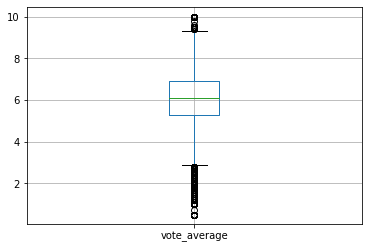

In [7]:
df.boxplot(column ='vote_average')

In [8]:
df['Highrating']=df['vote_average'].apply(lambda x: 1 if x >= 6.9 else 0)
df.head()

,Unnamed: 0,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,popularity,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,index,Highrating
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"Animation,Comedy,Family",862,tt0114709,en,Toy Story,21.946943,...,0,0,0,0,0,0,0,0,0,1
1,1,False,NaN,65000000,"Adventure,Fantasy,Family",8844,tt0113497,en,Jumanji,17.015539,...,0,0,0,0,0,0,0,0,8,1
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"Romance,Comedy",15602,tt0113228,en,Grumpier Old Men,11.712900,...,0,0,1,0,0,0,0,0,16,0
3,3,False,NaN,16000000,"Comedy,Drama,Romance",31357,tt0114885,en,Waiting to Exhale,3.859495,...,0,0,1,0,0,0,0,0,24,0
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,Comedy,11862,tt0113041,en,Father of the Bride Part II,8.387519,...,0,0,0,0,0,0,0,0,32,0


In [9]:
df['Highrating'].value_counts()

0    29471
1    10001
Name: Highrating, dtype: int64

# Logistic Regression


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [11]:
inputs0 = df[['Action', 'Adventure', 'Animation','Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
              'Foreign','History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller',
              'War', 'Western']]
Dep_var = df['Highrating']
X_train, X_test, Y_train, Y_test = train_test_split(inputs0, Dep_var, test_size =0.2, random_state = 0)
logit_model = sm.Logit(Y_train, X_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.546549
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Highrating   No. Observations:                31577
Model:                          Logit   Df Residuals:                    31557
Method:                           MLE   Df Model:                           19
Date:                Mon, 06 Dec 2021   Pseudo R-squ.:                 0.03614
Time:                        23:38:21   Log-Likelihood:                -17258.
converged:                       True   LL-Null:                       -17906.
Covariance Type:            nonrobust   LLR p-value:                5.892e-263
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Action             -0.7691      0.046    -16.708      0.000      -0.859      -0.679
Adventure          -0.2217      0.057     -3.867      0.000      -0.334      -0.109
Animation           0.4219      0.065      6.477      0.000       0.294       0.550
Comedy             -0.8360      0.027    -30.682      0.000      -0.889      -0.783
Crime              -0.0724      0.049     -1.487      0.137      -0.168       0.023
Documentary         0.1275      0.040      3.190      0.001       0.049       0.206
Drama              -0.3503      0.023    -15.149      0.000      -0.396      -0.305
Family             -0.8161      0.065    -12.531      0.000      -0.944      -0.688
Fantasy            -0.0967      0.067     -1.451      0.147      -0.227       0.034
Foreign            -0.4557      0.076     -6.024      0.000      -0.604      -0.307
History             0.0047      0.072      0.065      0.948      -0.136       0.145
Horror             -1.7235      0.064    -26.834      0.000      -1.849      -1.598
Music               0.0643      0.068      0.951      0.341      -0.068       0.197
Mystery            -0.1309      0.067     -1.956      0.050      -0.262       0.000
Romance            -0.3983      0.039    -10.177      0.000      -0.475      -0.322
Science Fiction    -0.7943      0.068    -11.687      0.000      -0.928      -0.661
TV Movie           -0.6195      0.117     -5.273      0.000      -0.850      -0.389
Thriller           -0.7498      0.045    -16.764      0.000      -0.837      -0.662
War                 0.0051      0.075      0.069      0.945      -0.142       0.152
Western            -1.0251      0.103     -9.932      0.000      -1.227      -0.823
===================================================================================
"""

In [12]:
y_pred = result.predict(X_test)
predictions = [round(value) for value in y_pred]

In [13]:
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.7500949968334388

In [14]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      5925
           1       0.50      0.16      0.24      1970

    accuracy                           0.75      7895
   macro avg       0.63      0.55      0.55      7895
weighted avg       0.70      0.75      0.70      7895



In [15]:
confusion_matrix(Y_test, predictions)

array([[5606,  319],
       [1654,  316]])

In [16]:
print('Sensitivity/Recall =' ,5606/(5606+319))
print('Precision =' ,5606/(5606+1654))

Sensitivity/Recall = 0.9461603375527426
Precision = 0.7721763085399449


# Decision Tree

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [18]:
inputs = df[['Action','Adventure','Animation','Comedy','Documentary','Drama','Family','Foreign','Horror','Mystery',
 'Romance','Science Fiction','TV Movie','Thriller','Western']]
target = df['Highrating']

In [19]:
fn = inputs.columns.to_list()

In [20]:
depth = 1 
score = {}
while depth < len(inputs.columns):
    model = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, test_size = 0.2)
    y_predict = model.fit(X_train, Y_train).predict(X_test)
    score[depth] = model.score(X_test, Y_test)
    print(depth)
    depth += 1
    print(classification_report(Y_test, y_predict))

1
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      5917
           1       0.00      0.00      0.00      1978

    accuracy                           0.75      7895
   macro avg       0.37      0.50      0.43      7895
weighted avg       0.56      0.75      0.64      7895

2
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      5846
           1       0.50      0.16      0.25      2049

    accuracy                           0.74      7895
   macro avg       0.63      0.55      0.54      7895
weighted avg       0.70      0.74      0.69      7895

3
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      5898
           1       0.80      0.00      0.00      1997

    accuracy                           0.75      7895
   macro avg       0.77      0.50      0.43      7895
weighted avg       0.76      0.75      0.64      7895

4
           

/Users/anitaaa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anitaaa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anitaaa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.77      0.95      0.85      5872
           1       0.51      0.16      0.24      2023

    accuracy                           0.74      7895
   macro avg       0.64      0.55      0.54      7895
weighted avg       0.70      0.74      0.69      7895

8
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      5883
           1       0.54      0.17      0.26      2012

    accuracy                           0.75      7895
   macro avg       0.66      0.56      0.55      7895
weighted avg       0.71      0.75      0.70      7895

9
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      5881
           1       0.54      0.17      0.26      2014

    accuracy                           0.75      7895
   macro avg       0.66      0.56      0.56      7895
weighted avg       0.71      0.75      0.70      7895

10
            

In [21]:
score

{1: 0.749461684610513,
 2: 0.7409753008233059,
 3: 0.7474350854971501,
 4: 0.7456618112729576,
 5: 0.7395820139328689,
 6: 0.7498416719442685,
 7: 0.7449018366054465,
 8: 0.7517416086130463,
 9: 0.7519949335022166,
 10: 0.7489550348321723,
 11: 0.7508549715009499,
 12: 0.7589613679544015,
 13: 0.7490816972767574,
 14: 0.7493350221659278}

# XG Boost

In [22]:
!pip install xgboost

     |████████████████████████████████| 1.3 MB 3.4 MB/s eta 0:00:01


In [23]:
!brew install libomp

Running `brew update --preinstall`...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/cask).
==> Updated Casks
Updated 1 cask.

To reinstall 13.0.0, run:
  brew reinstall libomp


In [24]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [40]:
y = df['Highrating']
X = df[['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']]

In [41]:
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [42]:
model = XGBClassifier()
model.fit(X_train, y_train)

/Users/anitaaa/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:44:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [44]:
accuracy = accuracy_score(y_test, predictions)

In [45]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.27%


In [46]:
confusion_matrix(y_test, predictions)

array([[5513,  332],
       [1699,  351]])